### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [7]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [8]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
cc = ChromatogramCreator(xcms_output)

DEBUG:ChromatogramCreator:Loading 0 chromatograms
../codes\VMSfunctions\Common.py:58: RuntimeWarning:

divide by zero encountered in double_scalars

DEBUG:ChromatogramCreator:Loading 5000 chromatograms
DEBUG:ChromatogramCreator:Loading 10000 chromatograms
DEBUG:ChromatogramCreator:Loading 15000 chromatograms
DEBUG:ChromatogramCreator:Loading 20000 chromatograms
DEBUG:ChromatogramCreator:Loading 25000 chromatograms
DEBUG:ChromatogramCreator:Loading 30000 chromatograms
DEBUG:ChromatogramCreator:Loading 35000 chromatograms
DEBUG:ChromatogramCreator:Loading 40000 chromatograms
DEBUG:ChromatogramCreator:Loading 45000 chromatograms


### Generate some chemicals

In [9]:
hmdb = load_obj('../models/hmdb_compounds.p')

In [10]:
chemicals = ChemicalCreator(ps)

In [11]:
min_ms1_intensity = 2E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1000)]
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, 1000, 2, "Known", None, hmdb, 0.1)

DEBUG:ChemicalCreator:1000 ms1 peaks to be created.
DEBUG:ChemicalCreator:i = 0
DEBUG:ChemicalCreator:i = 25
DEBUG:ChemicalCreator:i = 50
DEBUG:ChemicalCreator:i = 75
DEBUG:ChemicalCreator:i = 100
DEBUG:ChemicalCreator:i = 125
DEBUG:ChemicalCreator:i = 150
DEBUG:ChemicalCreator:i = 175
DEBUG:ChemicalCreator:i = 200
DEBUG:ChemicalCreator:i = 225
DEBUG:ChemicalCreator:i = 250
DEBUG:ChemicalCreator:i = 275
DEBUG:ChemicalCreator:i = 300
DEBUG:ChemicalCreator:i = 325
DEBUG:ChemicalCreator:i = 350
DEBUG:ChemicalCreator:i = 375
DEBUG:ChemicalCreator:i = 400
DEBUG:ChemicalCreator:i = 425
DEBUG:ChemicalCreator:i = 450
DEBUG:ChemicalCreator:i = 475
DEBUG:ChemicalCreator:i = 500
DEBUG:ChemicalCreator:i = 525
DEBUG:ChemicalCreator:i = 550
DEBUG:ChemicalCreator:i = 575
DEBUG:ChemicalCreator:i = 600
DEBUG:ChemicalCreator:i = 625
DEBUG:ChemicalCreator:i = 650
DEBUG:ChemicalCreator:i = 675
DEBUG:ChemicalCreator:i = 700
DEBUG:ChemicalCreator:i = 725
DEBUG:ChemicalCreator:i = 750
DEBUG:ChemicalCreator:i

KnownChemical - 'C14H30' rt=998.52 max_intensity=2116885.58
[1886596.125 1920511.625 2116404.75  1762040.25  1962235.5   1789296.375
 1612644.75  1438885.25 ]


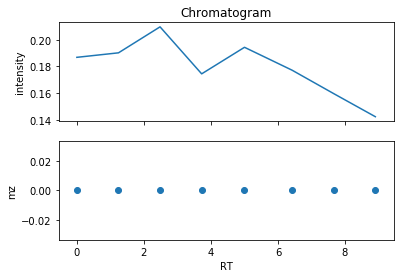

KnownChemical - 'C19H20O7S' rt=207.24 max_intensity=458613.44
[293570.84375  141041.25     106072.953125 119606.921875 295135.59375
 145280.53125  292428.71875  415537.8125   458595.       445350.8125
 409157.96875  309627.3125   321191.28125  297997.09375  306453.4375
 426674.40625  320297.84375  307723.6875   356822.625    375594.5
 358984.59375  261505.65625  288116.15625  235019.75      98411.265625
 291084.125   ]


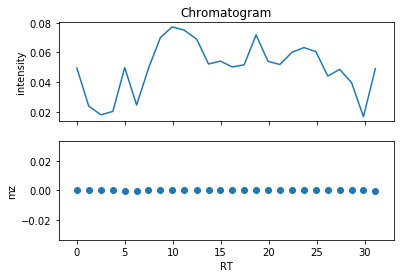

KnownChemical - 'C13H11N3' rt=485.14 max_intensity=475879.40
[258570.78125  322380.15625  256838.953125 475887.5      305954.53125
 447456.875    449938.25     475322.46875  366233.03125  432745.03125
 383046.15625 ]


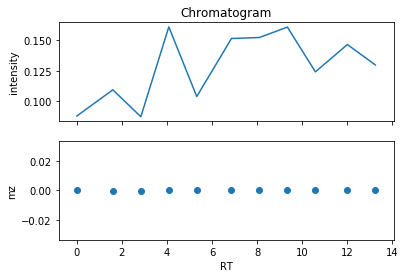

KnownChemical - 'I2' rt=825.76 max_intensity=17699198.10
[ 2388575.25  2852355.5   5167719.5   5978886.    7073282.    8890094.
  9496618.   11147034.   11601901.   13774655.   13571605.   17695224.
 16237196.  ]


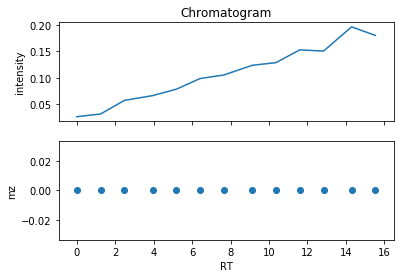

KnownChemical - 'C3H11NO7P2' rt=685.73 max_intensity=590535.71
[526157.375   549816.0625  590519.0625  576063.25    423737.15625
 411152.21875 367682.8125 ]


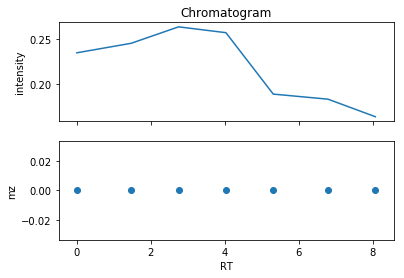

KnownChemical - 'I2' rt=566.50 max_intensity=1501500.96
[1445433.125 1306483.5   1344007.5   1429277.    1429303.125 1501761.625
 1427345.25  1341142.    1320769.    1277649.375 1221766.125]


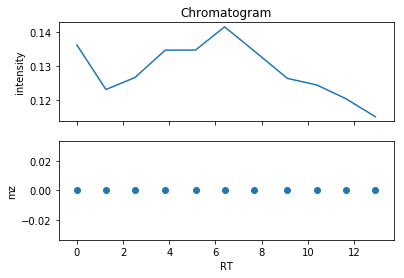

KnownChemical - 'C16H25NO4' rt=605.63 max_intensity=255665.00
[ 75840.1484375 142289.65625   241607.9375    255668.890625
 218704.453125  219357.3125    214016.046875  153590.4375
 137547.578125 ]


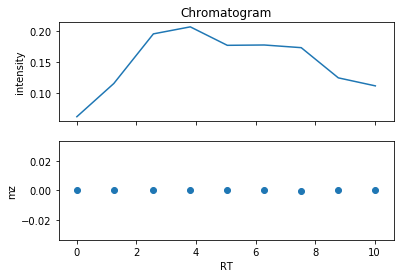

KnownChemical - 'C14H30' rt=741.31 max_intensity=363689.10
[162427.84375  146451.625    167788.4375   225771.921875 303286.125
 328325.4375   363675.09375  300980.5625   253687.8125   194785.703125]


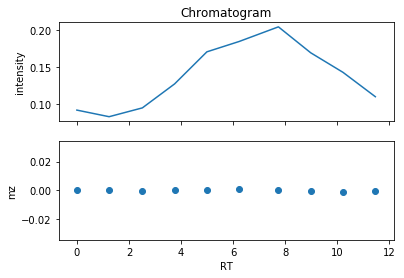

KnownChemical - 'C20H34O' rt=691.41 max_intensity=1603793.71
[ 299705.21875   327695.875     444286.8125    474079.71875
  627351.9375    951960.625     935076.6875    882336.9375
 1308713.875    1292985.625    1386822.75     1603699.25
 1536923.625    1582613.75     1271507.75     1254378.125
 1001090.125     677425.        307049.8125    325857.5625
  303518.375     248986.890625]


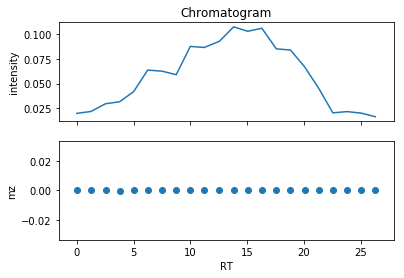

KnownChemical - 'C14H11NO4' rt=448.85 max_intensity=757725.65
[100243.      116622.71875 342811.4375  365412.9375  556228.3125
 718147.875   698708.1875  753117.1875  757717.5625  562123.
 391319.96875 235339.1875  169205.59375  65601.40625]


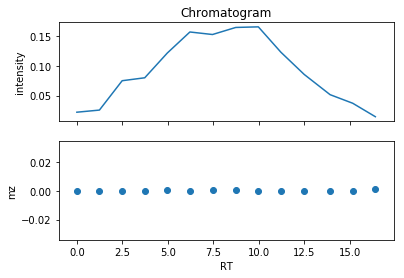

In [12]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

In [14]:
set_log_level_warning() # We don't want to see too many messages as the controller is running

In [15]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False
controller.run(rt_range[0][0], rt_range[0][1])

1080.1779016802977it [05:24,  3.33it/s]                                                                                                                                                                 


In [16]:
save_obj(controller, '../models/test_controller.p')

In [18]:
controller = load_obj('../models/test_controller.p')

Print the peaks generated for each chemical

In [19]:
chem = controller.mass_spec.chemicals[0]
peaks = controller.mass_spec.chemicals_to_peaks[chem]
print(chem)
for i in range(len(peaks)):
    p = peaks[i]
    print(p)
    if i >= 3:
        break

KnownChemical - 'C14H30' rt=998.52 max_intensity=2116885.58
Peak mz=199.2421 rt=998.55 intensity=261923.73 ms_level=1
Peak mz=240.2686 rt=998.55 intensity=15416.79 ms_level=1
Peak mz=231.2683 rt=998.55 intensity=2270.84 ms_level=1
Peak mz=216.2686 rt=998.55 intensity=0.00 ms_level=1


Save to mzML file

In [20]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a Top-N controller

In [ ]:
max_rt = 1000                   # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a DIA controller

In [ ]:
max_rt = 1000
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', '../models/out.mzML')